##Exercícios Análise Exploratória de Dados - Conjunto de dados Iris
Disciplina de Data Mining - INE5644 - CTC/INE/UFSC

Prof. Jônata Tyska Carvalho



In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

###Carrega o conjunto de dados

In [2]:
url = "https://codigos.ufsc.br/jonata.tyska/repositorio/-/raw/master/datasets/iris.csv"

# Assign colum names to the dataset
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

# Read dataset to pandas dataframe
dataset = pd.read_csv(url)

**Exercício 1.** Qual o tamanho do conjunto de dados carregado (instâncias e atributos)?

In [8]:
#Formato do dataset
dataset.shape

(150, 5)

**Exercício 2.** Quais são as colunas do conjunto de dados?

In [9]:
#Listagem das colunas
dataset.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

**Exercício 3.** Quantas instâncias de cada classe existem no conjunto de dados?

In [16]:
#Contagem de valores por classe
dataset.groupby('species').count()


,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,50,50,50,50
versicolor,50,50,50,50
virginica,50,50,50,50


**Exercício 4.** Para cada atributo, calcule o número de valores disponíveis (contagem), a média, o desvio padrão, o valor mínimo, o máximo, o primeiro (Q1), segundo(Q2) e terceiro (Q3) quartis e o valor máximo.

In [17]:
#Descrição do dataset
dataset.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**Exercício 5.** Visualize os dados usando histogramas para cada um dos atributos.

array([[<Axes: title={'center': 'sepal_length'}>,
        <Axes: title={'center': 'sepal_width'}>],
       [<Axes: title={'center': 'petal_length'}>,
        <Axes: title={'center': 'petal_width'}>]], dtype=object)

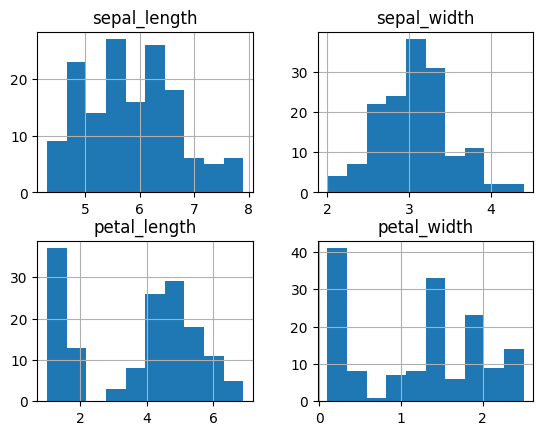

In [33]:
#Criação de histograma
dataset.hist()

**Exercício 6.** Visualize os dados usando gráficos de dispersão para cada dupla de atributos.

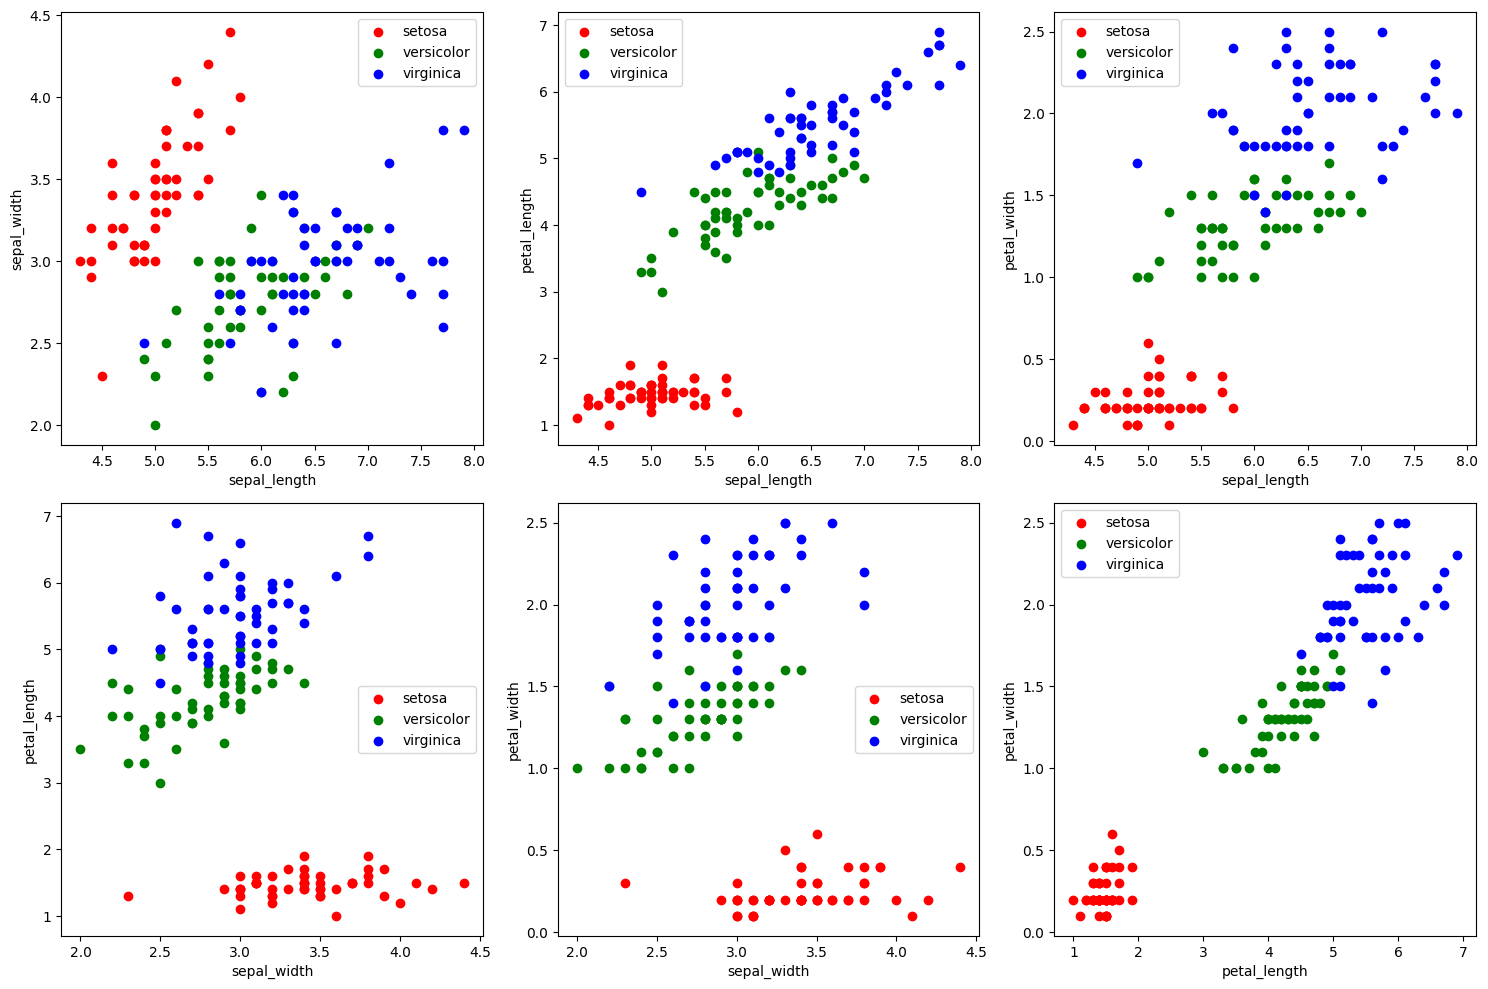

In [67]:
# Crie um dicionário para mapear cores para cada valor único em 'species'.
colors = {'setosa': 'red', 'versicolor': 'green', 'virginica': 'blue'}

# Crie uma lista de todas as combinações possíveis de colunas.
column_combinations = [('sepal_length', 'sepal_width'),
                       ('sepal_length', 'petal_length'),
                       ('sepal_length', 'petal_width'),
                       ('sepal_width', 'petal_length'),
                       ('sepal_width', 'petal_width'),
                       ('petal_length', 'petal_width')]

# Crie uma grade de subtramas para exibir os gráficos de dispersão.
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Itere pelas combinações de colunas e crie os gráficos de dispersão correspondentes.
for i, (x_col, y_col) in enumerate(column_combinations):
    row = i // 3
    col = i % 3

    ax = axes[row, col]

    for species, color in colors.items():
        species_data = dataset[dataset['species'] == species]
        ax.scatter(species_data[x_col], species_data[y_col], color=color, label=species)

    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)
    ax.legend()

# Ajuste os espaçamentos entre as subtramas.
plt.tight_layout()

# Exiba os gráficos.
plt.show()

**Exercício 7.** Use um tipo de gráfico que ajude a detectar valores atípicos (*outliers*)

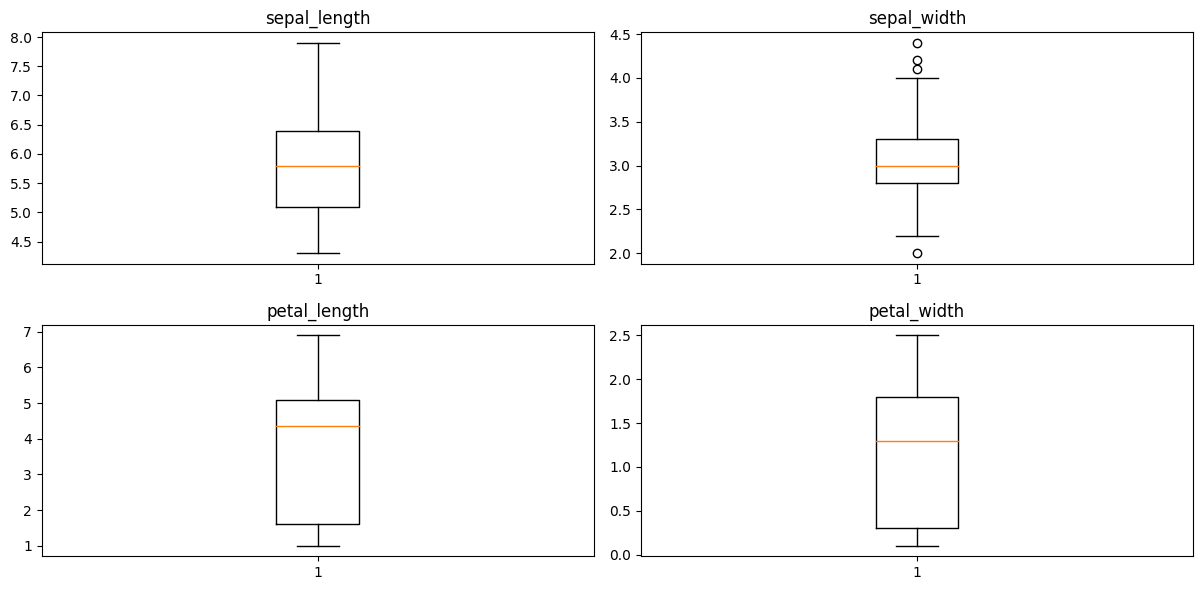

In [68]:
numeric_columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# Crie um gráfico de caixa para cada coluna numérica.
plt.figure(figsize=(12, 6))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 2, i)
    plt.boxplot(dataset[col])
    plt.title(col)

# Ajuste os espaçamentos entre os subplots.
plt.tight_layout()

# Exiba os gráficos de caixa.
plt.show()

**Exercício 8.** Visualize a correlação entre as variáveis



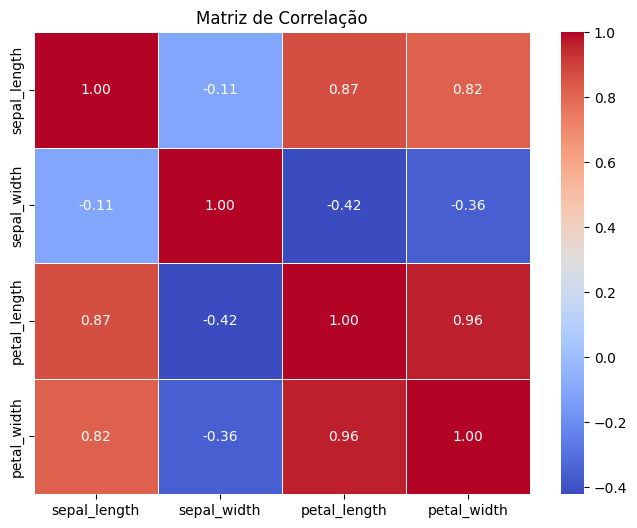

In [63]:
# Crie um DataFrame apenas com as colunas numéricas.
numeric_columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
numeric_data = dataset[numeric_columns]

# Calcule a matriz de correlação.
correlation_matrix = numeric_data.corr()

# Crie um mapa de calor da matriz de correlação.
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlação")
plt.show()